<a href="https://colab.research.google.com/github/celefigs/collaborative_project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#modif

In [13]:
from PIL import Image
from IPython.display import display

# Data Science Project

## Table of Contents
- [Context Introduction](#context-introduction)
- [Importing Libraries and Reading the Data](#importing-libraries-and-reading-the-data)
- [Initial DataFrame Exploration](#initial-dataframe-exploration)
- [Data Cleaning](#data-cleaning)
  - Filtering Relevant Conditions
- [Summary Statistics: Numeric and Categorical](#summary-statistics-numeric-and-categorical)
- [Visualization](#visualization)
- [Top 5 Most Used Drugs](#top-5-most-used-drugs)
- [Text Processing](#text-processing)


In [14]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# img = mpimg.imread(r'../images/Sentiment-analysis-HUB-Final')
# plt.figure(figsize=(10, 5))
# plt.imshow(img)
# plt.axis('off')  # Opcional: oculta los ejes
# plt.show()


In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

## Context Introduction

recoleccion de datos, etc

## Importing Libraries and Reading the Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

import nltk
import re

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

from wordcloud import WordCloud

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('punkt_tab')
# nltk.download('stopwords')

In [17]:
file_path = '../data/drugsComTrain.csv'

drug_data_df=pd.read_csv(file_path)

drug_data_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [18]:
# #colab

# drug_data_df=pd.read_csv('/drugsComTrain.csv')

# drug_data_df.head()


## Initial DataFrame Exploration

In [19]:
drug_data_df.shape

(161297, 7)

In [20]:
drug_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [21]:
#remove column "UniqueID"

drug_data_df=drug_data_df.drop(columns=['uniqueID'])

drug_data_df.head(2)

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192


## Data Cleaning

In [22]:
#lower for clarification

drug_data_df.columns = drug_data_df.columns.str.lower()

**Filtering Relevant Conditions**

In [23]:
#search related words in a "condition" column and create a new DataFrame with only the relevant conditions

pattern = r'birth|birth control|contraception|contraceptive methods|birth control pills|birth control devices|family planning'

filtered_df = drug_data_df[drug_data_df['condition'].str.contains(pattern, case=False, na=False)]

filtered_df.head()

,drugname,condition,review,rating,date,usefulcount
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10


In [24]:
#cuantas condiciones tenemos? also, in this step reduce the rows in 129846

formatted_conditions = ', '.join(filtered_df['condition'].unique())

print(f"The related conditions are: {formatted_conditions}")

The related conditions are: Birth Control, Emergency Contraception


In [25]:
filtered_df.duplicated().sum() #if had---> drop dupl

0

In [26]:
#buscar nan values

nan_values = filtered_df.isna().sum()

print(nan_values)

drugname       0
condition      0
review         0
rating         0
date           0
usefulcount    0
dtype: int64


## Summary Statistics: Numeric and Categorical

**Summary statistics for numerical columns**

In [27]:
filtered_df.describe().T

# rating: 6,27 media;
# std	3.33-> means diversity;
# rating goes from 1 to 10;

,count,mean,std,min,25%,50%,75%,max
rating,31251.0,6.274551,3.331740,1.0,3.0,7.0,9.0,10.0
usefulcount,31251.0,8.248824,17.665796,0.0,2.0,5.0,9.0,1247.0


Rating

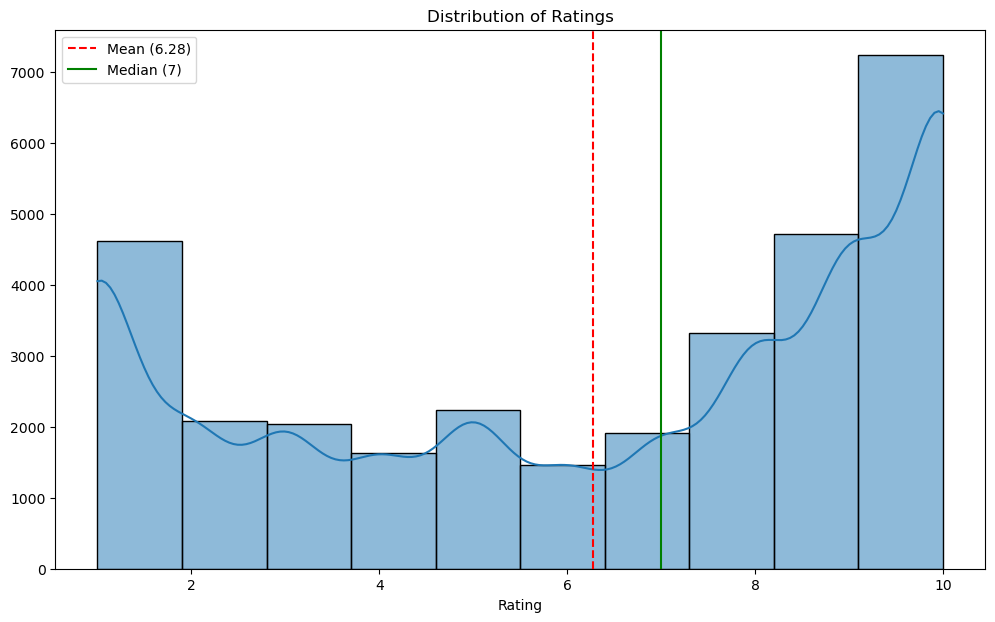

In [28]:
# Rating:  this graphic help us to explain  the 2nd and 3rd cuartiles

plt.figure(figsize=(12, 7))

sns.histplot(filtered_df['rating'], bins=10, kde=True)

plt.axvline(x=filtered_df['rating'].mean(), color='red', linestyle='--', label='Mean (6.28)')
plt.axvline(x=filtered_df['rating'].median(), color='green', linestyle='-', label='Median (7)')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('')
plt.legend()
#plt.grid()



find out about over rating, rating vs bad reviews

Useful Count

- Range goes from 0 to 1247, indicating that some reviews received a high number of useful votes while others were not considered useful at all.
- Approximately 3.96% of reviews are deemed useful
- 75% of reviews received 9 or fewer useful votes, indicating that many reviews fall within a lower utility range
- High variability in useful votes suggests that reviews are perceived quite differently; some receive numerous useful votes while others do not, reflecting differences in quality, relevance, or style.

#I didn't create a graph because it's hard for me to explain it

**Summary statistics for categorical columns**

In [29]:
filtered_df.describe(exclude='number').T

,count,unique,top,freq
drugname,31251,182,Levonorgestrel,3350
condition,31251,2,Birth Control,28788
review,31251,19715,"""I began taking Mononesse April 28th 2015. I w...",4
date,31251,3085,22-Sep-15,48


## Visualization

**Top 5 Most Used Drugs**

In [30]:
#top 5 drugName
#top_5_used_drugs = filtered_df['drugname'].value_counts().sort_values(ascending=False).head(5)

top_5_used_drugs = filtered_df['drugname'].value_counts().nlargest(5)

top_5_used_drugs

drugname
Levonorgestrel                        3350
Etonogestrel                          3314
Ethinyl estradiol / norethindrone     2337
Nexplanon                             2149
Ethinyl estradiol / levonorgestrel    1600
Name: count, dtype: int64

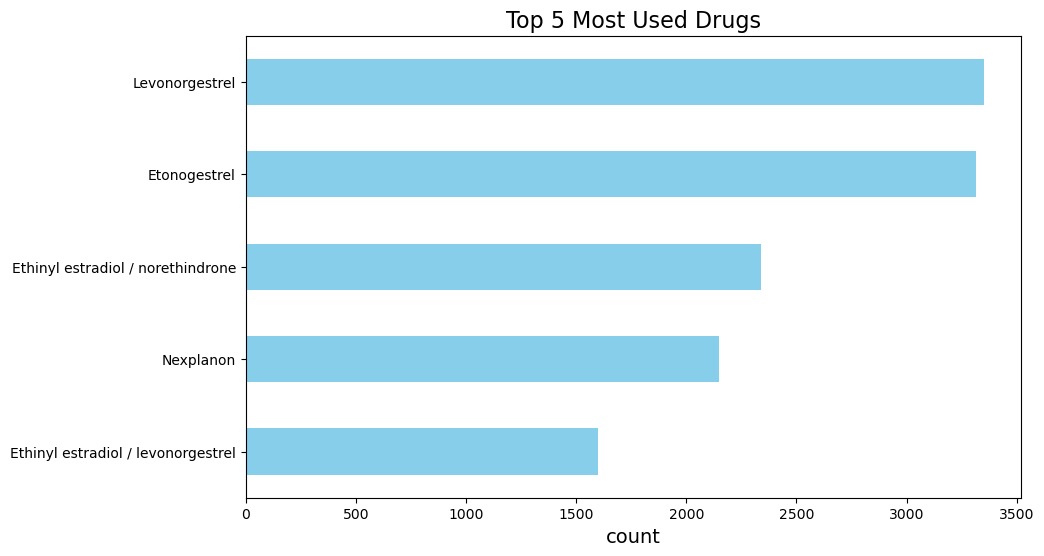

In [31]:
import matplotlib.pyplot as plt


top_5_used_drugs = filtered_df['drugname'].value_counts().nlargest(5).sort_values(ascending= True)

plt.figure(figsize=(10, 6))
top_5_used_drugs.plot(kind='barh', color='skyblue')
plt.title('Top 5 Most Used Drugs', fontsize=16)
plt.xlabel('count', fontsize=14)
plt.ylabel('')

#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [32]:
#I would like to create a visualization of the top 5 drugs vs average ratings of each,
# #I've tried using groupby and haven't been able to d oit

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Celeste\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# segregation for analysis Top 5
# Levonorgestrel
# Etonogestrel
# Ethinyl estradiol / norethindrone
# Nexplanon
# Ethinyl estradiol / levonorgestrel


levonorgestrel_reviews = filtered_df[filtered_df['drugname'] == 'Levonorgestrel']['review'].tolist()
etonogestrel_reviews = filtered_df[filtered_df['drugname'] == 'Etonogestrel']['review'].tolist()
ethinyl_estradiol_nore_reviews = filtered_df[filtered_df['drugname'] == 'Ethinyl estradiol / norethindrone']['review'].tolist()
nexplanon_reviews = filtered_df[filtered_df['drugname'] == 'Nexplanon']['review'].tolist()
ethinyl_estradiol_levo_reviews = filtered_df[filtered_df['drugname'] == ' Ethinyl estradiol / levonorgestrel']['review'].tolist()



In [35]:
stops = set(stopwords.words('english'))

# #wordcloud_levonogestrel = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords).generate(levonorgestrel_reviews)
# wordcloud_levonorgestrel = WordCloud(background_color="black", width=800, height=400, stopwords=stops).generate(" ".join(levonorgestrel_reviews))

# # Plott the word cloud
# plt.figure(figsize=(15, 10))
# plt.imshow(wordcloud_levonorgestrel, interpolation='bilinear')
# plt.axis("off")


In [36]:
# wordcloud_etenogestrel = WordCloud(background_color="black", width=800, height=400, stopwords=stops).generate(" ".join(etonogestrel_reviews))

# # Plott the word cloud
# plt.figure(figsize=(15, 10))
# plt.imshow(wordcloud_etenogestrel, interpolation='bilinear')
# plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

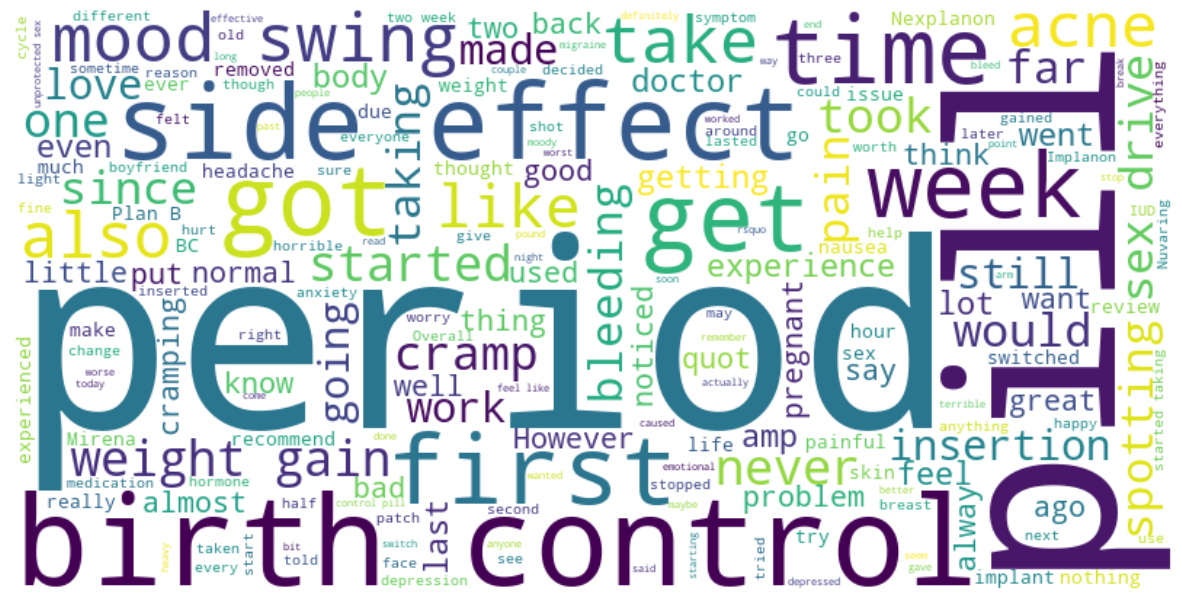

In [37]:
temporary_stops = stops.union(['day', 'month', 'year', 'days', 'months', 'years'])

wordcloud_review = WordCloud(background_color="white", width=800, height=400, stopwords=temporary_stops).generate(" ".join(filtered_df['review']))

# Plott the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.axis("off")

In [38]:
difference_temp_stops = temporary_stops.difference(stops)
print("Elements in temporary_stops but not in stops:", difference_temp_stops)


Elements in temporary_stops but not in stops: {'day', 'months', 'year', 'days', 'month', 'years'}


In [39]:
filtered_df

,drugname,condition,review,rating,date,usefulcount
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10
...,...,...,...,...,...,...
161268,Portia,Birth Control,"""I switched to Portia 12 days ago when I start...",1,28-Jan-14,9
161269,Ethinyl estradiol / norethindrone,Birth Control,"""When I first starting taking Lo Loestrin Fe, ...",10,20-Apr-15,13
161271,Mirena,Birth Control,"""My experience: Painful insertion but I expect...",10,26-Jan-16,4
161273,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0


## Text Processing

In [40]:
#Tokenization

# Def regex
REPLACE_NO_SPACE = re.compile(r"[.;:!#\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)")

In [41]:
filtered_df['drugname'][9]

'Ethinyl estradiol / levonorgestrel'

In [42]:
#Preprocess function for 'drugname' column

def preprocess_drugname(drugname):

    #remove special characters
    drugname = re.sub(REPLACE_NO_SPACE, "", drugname)
    drugname= re.sub(REPLACE_WITH_SPACE, " ", drugname)

    # Remove leading/trailing whitespace
    drugname = drugname.strip()

    # Remove double spaces
    drugname = re.sub(r'\s+', ' ', drugname)

    return drugname

In [43]:
#filtered_df['drugname'] = filtered_df['drugname'].apply(preprocess_drugname)

filtered_df.loc[:,'drugname'] = filtered_df['drugname'].apply(preprocess_drugname) # ":" todas las filas -> df.loc[fila, columna]

In [44]:
filtered_df['drugname'][9]

'Ethinyl estradiol levonorgestrel'

In [45]:
#Preprocess function for 'review' column

stop_words = set(stopwords.words('english'))

def preprocess_review(reviews):

    #remove special characters
    reviews = re.sub(REPLACE_NO_SPACE, "", reviews)
    reviews = re.sub(REPLACE_WITH_SPACE, " ", reviews)

    tokens = word_tokenize(reviews)

    # lowercase and lemmatize
    lemmatizer = WordNetLemmatizer()

    lemmas = [lemmatizer.lemmatize(token.lower(), pos='v') for token in tokens if token.lower() not in stop_words]
    lemmas = [lemmatizer.lemmatize(token.lower(), pos='n') for token in lemmas if token.lower() not in stop_words]


    return lemmas

In [46]:
# Def regex
REPLACE_NO_SPACE = re.compile(r"[.;:!#\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)")

# re.sub

In [47]:
stop_words = set(stopwords.words('english'))

In [48]:
print(stop_words)

{'same', 'ma', 'between', 'each', "wouldn't", "you've", 'then', 'more', 're', 'mustn', 'under', 'was', 'they', 'hers', 'up', 'further', 'few', 'some', 'than', 'these', 'are', 'how', 'do', "didn't", 'most', 'very', "weren't", "you'll", 'hadn', 'those', 'an', 'again', 'won', 'itself', 'whom', 'because', 'the', 'down', 'ours', 'o', 'doesn', 'aren', 'below', 'd', 'over', "shouldn't", 'your', 'just', 'so', "isn't", 'after', "hasn't", 'such', 'haven', "doesn't", 'off', 'it', 'and', 'is', 'themselves', 'being', 'but', 'other', 'don', 'now', 'didn', 'all', 'if', 'myself', 'her', 'here', 'shan', 'any', 'had', "aren't", 'only', "mightn't", 'as', 'can', 'wasn', 'no', 'our', 'does', 'until', 'has', 'wouldn', 'about', 'a', 'them', 'own', 'yours', 'i', 'on', "haven't", 'should', 'yourselves', 'at', 'doing', 'been', 'there', 'll', 'weren', 'which', 'be', 'having', 'during', 'y', 'above', 'm', 'where', 'out', 'while', "shan't", 'not', 'will', "wasn't", "mustn't", 'me', 'himself', 've', 't', 'once', 'n

In [49]:
def cleaning_function(reviews):

    #characters
    reviews = re.sub(REPLACE_NO_SPACE, "", reviews)
    reviews = re.sub(REPLACE_WITH_SPACE, "", reviews)

    #tokenize
    tokens = word_tokenize(reviews) #new job

    #lemmas:  lemma, lower, stopwords
    lemmatizer = WordNetLemmatizer()

    lemmas = [lemmatizer.lemmatize(token.lower(), pos='v') for token in tokens if token.lower() not in stop_words]
    lemmas = [lemmatizer.lemmatize(token.lower(), pos='n') for token in lemmas if token.lower() not in stop_words]

    return lemmas

In [50]:
preprocess_review('sung')

['sing']

In [51]:
filtered_df['review'].iloc[9]

'"I was off birth control for a while considering getting pregnant. I had used other types of birth control before, the pill, the patch, etc. I decided to get back on birth control but didn&#039;t want to worry about taking a daily pill so I requested the Nuvaring. When I started the Nuvaring I felt it inside my body and had a lot of cramps. A few days later I started experiencing more cramps and very strong upper stomach pain. They were so bad I missed work for a week. Finally I ended up going to the ER and they couldn&#039;t figure out what was wrong. I finally asked the doctor and it was the Nuvaring side effects."'

In [52]:
#sanity check
filtered_df['review'].iloc[9]

'"I was off birth control for a while considering getting pregnant. I had used other types of birth control before, the pill, the patch, etc. I decided to get back on birth control but didn&#039;t want to worry about taking a daily pill so I requested the Nuvaring. When I started the Nuvaring I felt it inside my body and had a lot of cramps. A few days later I started experiencing more cramps and very strong upper stomach pain. They were so bad I missed work for a week. Finally I ended up going to the ER and they couldn&#039;t figure out what was wrong. I finally asked the doctor and it was the Nuvaring side effects."'

In [53]:
preprocess_review(filtered_df['review'].iloc[9])

['birth',
 'control',
 'consider',
 'get',
 'pregnant',
 'use',
 'type',
 'birth',
 'control',
 'pill',
 'patch',
 'etc',
 'decide',
 'get',
 'back',
 'birth',
 'control',
 '&',
 '039t',
 'want',
 'worry',
 'take',
 'daily',
 'pill',
 'request',
 'nuvaring',
 'start',
 'nuvaring',
 'felt',
 'inside',
 'body',
 'lot',
 'cramp',
 'day',
 'later',
 'start',
 'experience',
 'cramp',
 'strong',
 'upper',
 'stomach',
 'pain',
 'bad',
 'miss',
 'work',
 'week',
 'finally',
 'end',
 'go',
 'er',
 '&',
 '039t',
 'figure',
 'wrong',
 'finally',
 'ask',
 'doctor',
 'nuvaring',
 'side',
 'effect']

In [54]:
## consultas:
# 1- does preprocess_review working well? I think lemma is not working

In [55]:
filtered_df.review

2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
6         "He pulled out, but he cummed a bit in me. I t...
9         "I had been on the pill for many years. When m...
14        "Started Nexplanon 2 months ago because I have...
                                ...                        
161268    "I switched to Portia 12 days ago when I start...
161269    "When I first starting taking Lo Loestrin Fe, ...
161271    "My experience: Painful insertion but I expect...
161273    "I have had the Nexplanon since Dec. 27, 2016 ...
161291    "This would be my second month on Junel. I&#03...
Name: review, Length: 31251, dtype: object

In [56]:
# vectoriser = TfidfVectorizer(analyzer=preprocess_review)
# data_tfidf = vectoriser.fit_transform(filtered_df.review)

In [63]:
# # Use a pipeline??
# from transformers import pipeline
# import torch

# pipe = pipeline("text-classification", model="juliensimon/reviews-sentiment-analysis")



In [64]:
# # Load model directly -> consultar Filipa
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("juliensimon/reviews-sentiment-analysis")
# model = AutoModelForSequenceClassification.from_pretrained("juliensimon/reviews-sentiment-analysis")

In [65]:
# torch

In [66]:
# from transformers import pipeline

# classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# sentences = ["I am feeling bit weird today"]

# model_outputs = classifier(sentences)
# print(model_outputs[0])
# # produces a list of dicts for each of the labels


In [27]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import nltk

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [28]:
file_path = '../data/final_data.csv'

final_data_df=pd.read_csv(file_path)

final_data_df.head()

,Unnamed: 0,provided_drug_name,condition,review,rating,date,usefulCount,matched_generic_name,matched_type
0,0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,NaN,NaN
1,1,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,NaN,NaN
2,2,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,levonorgestrel,emergency
3,3,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,ethinyl estradiol / norethindrone,standard
4,4,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10,etonogestrel,standard


In [29]:
#removing columns
final_data_df = final_data_df.drop(['Unnamed: 0', 'condition', 'date', 'usefulCount', 'matched_generic_name', 'matched_type'], axis=1)

final_data_df

,provided_drug_name,review,rating
0,Lybrel,"""I used to take another oral contraceptive, wh...",5
1,Ortho Evra,"""This is my first time using any form of birth...",8
2,Levonorgestrel,"""He pulled out, but he cummed a bit in me. I t...",1
3,Ethinyl estradiol / levonorgestrel,"""I had been on the pill for many years. When m...",8
4,Nexplanon,"""Started Nexplanon 2 months ago because I have...",3
...,...,...,...
31246,Portia,"""I switched to Portia 12 days ago when I start...",1
31247,Ethinyl estradiol / norethindrone,"""When I first starting taking Lo Loestrin Fe, ...",10
31248,Mirena,"""My experience: Painful insertion but I expect...",10
31249,Nexplanon,"""I have had the Nexplanon since Dec. 27, 2016 ...",6


In [41]:
final_data_df.rename(columns= {"provided_drug_name":"drugname"}, inplace= True)

In [42]:
#label  pos and neg

def label_rating(rating):
    if rating <= 5:
        return 'Negative'
    else:
        return 'Positive'

In [43]:
final_data_df['label'] = final_data_df['rating'].apply(label_rating)

In [44]:
final_data_df.head(7)

,drugname,review,rating,label
0,Lybrel,"""I used to take another oral contraceptive, wh...",5,Negative
1,Ortho Evra,"""This is my first time using any form of birth...",8,Positive
2,Levonorgestrel,"""He pulled out, but he cummed a bit in me. I t...",1,Negative
3,Ethinyl estradiol / levonorgestrel,"""I had been on the pill for many years. When m...",8,Positive
4,Nexplanon,"""Started Nexplanon 2 months ago because I have...",3,Negative
5,Etonogestrel,"""Nexplanon does its job. I can have worry free...",9,Positive
6,Implanon,"""Never again! After being on depo I was suppos...",2,Negative


In [33]:
final_data_df['label'].value_counts()

label
Positive    18643
Negative    12608
Name: count, dtype: int64

In [19]:
# 60% of the ratings are "Positive" and  40% are "Negative".

Start with the pre-processing text

In [34]:
# Def RegEx
REPLACE_NO_SPACE = re.compile(r"[.;:!#\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)")

# We want to remove everything that is not a proper character. RegEx for non-alphanumerical characters.

In [35]:
#Preprocess function for "review" column

stop_words = set(stopwords.words('english'))

def preprocess_review(reviews):

    # Remove special characters
    reviews = re.sub(REPLACE_NO_SPACE, "", reviews)
    reviews = re.sub(REPLACE_WITH_SPACE, " ", reviews)

    tokens = word_tokenize(reviews)

    # Lowercase and lemmatize
    lemmatizer = WordNetLemmatizer()

    lemmas = [lemmatizer.lemmatize(token.lower(), pos='v') for token in tokens if token.lower() not in stop_words]
    lemmas = [lemmatizer.lemmatize(token.lower(), pos='n') for token in lemmas if token.lower() not in stop_words]


    return lemmas

In [23]:
text = final_data_df['review'][0]
print(text)

"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.
The positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."


In [22]:
# sanity check - DELETE
preprocess_review(text)

['use',
 'take',
 'another',
 'oral',
 'contraceptive',
 '21',
 'pill',
 'cycle',
 'happy',
 'light',
 'period',
 'max',
 '5',
 'day',
 'side',
 'effect',
 'contain',
 'hormone',
 'gestodene',
 'available',
 'u',
 'switch',
 'lybrel',
 'ingredient',
 'similar',
 'pill',
 'end',
 'start',
 'lybrel',
 'immediately',
 'first',
 'day',
 'period',
 'instruction',
 'say',
 'period',
 'last',
 'two',
 'week',
 'take',
 'second',
 'pack',
 'two',
 'week',
 'third',
 'pack',
 'thing',
 'get',
 'even',
 'worse',
 'third',
 'period',
 'last',
 'two',
 'week',
 '&',
 '039s',
 'end',
 'third',
 'week',
 'still',
 'daily',
 'brown',
 'discharge',
 'positive',
 'side',
 '&',
 '039t',
 'side',
 'effect',
 'idea',
 'period',
 'free',
 'tempt',
 'ala']

In [ ]:
#Preprocess function for 'drugname' column

def preprocess_drugname(drugname):

    #remove special characters
    drugname = re.sub(REPLACE_NO_SPACE, "", drugname)
    drugname= re.sub(REPLACE_WITH_SPACE, " ", drugname)

    # Remove leading/trailing whitespace
    drugname = drugname.strip()

    # Remove double spaces
    drugname = re.sub(r'\s+', ' ', drugname)

    return drugname

In [ ]:
#aplicar tokenization a todo el data set

In [26]:
final_data_df.head()

,review,rating,label
0,"""I used to take another oral contraceptive, wh...",5,Negative
1,"""This is my first time using any form of birth...",8,Positive
2,"""He pulled out, but he cummed a bit in me. I t...",1,Negative
3,"""I had been on the pill for many years. When m...",8,Positive
4,"""Started Nexplanon 2 months ago because I have...",3,Negative


Splitting tha dataset

In [25]:
from sklearn.model_selection import train_test_split

# X = independent variable = review,  y = target variable (dependent) = rating
X_train, X_test, y_train, y_test = train_test_split(array?, test_size=0.2, random_state=42)


SyntaxError: invalid syntax (1487484644.py, line 3)

¡Perfecto! Aquí están los pasos que deberías seguir sin incluir código:

### 1. **Tokenización y Preprocesamiento del Texto**
   - **Tokenización**: Convierte el texto en palabras individuales (*unigrams*), o en pares de palabras (*bigrams*). Puedes usar ambos (combinados) según lo que quieras analizar.
   - **Eliminar stopwords**: Remueve palabras comunes y sin valor semántico como “el”, “de”, “que”, etc.
   - **Lematización**: Reduce las palabras a su forma base (ej., “corriendo” → “correr”).

### 2. **División del Conjunto de Datos (Train-Test Split)**
   - Antes de aplicar el esquema de ponderación, divide tus datos en un conjunto de entrenamiento y otro de prueba. Generalmente, el 80% para entrenamiento y el 20% para prueba.

### 3. **Esquema de Ponderación (Weighting Scheme)**
   Aplica uno de los siguientes métodos para convertir el texto en una representación numérica:
   - **Count Vectorizer**: Cuenta la frecuencia de aparición de cada palabra.
   - **TF-IDF (Term Frequency-Inverse Document Frequency)**: Ajusta la frecuencia de las palabras en relación a cuán comunes son en el conjunto de datos.
   - **Mutual Information**: Calcula qué palabras son más informativas para la clasificación.

### 4. **Construir el Modelo (Supervised Learning)**
   Entrena varios modelos para ver cuál se desempeña mejor. Empieza con:
   - **Modelo Base (Baseline Model)**: Entrena un modelo **Naive Bayes** como referencia inicial.
   - **SVM (Support Vector Machines)**: Un modelo efectivo para texto.
   - **XGBoost**: Un modelo basado en árboles que suele ser más potente, aunque más complejo.
   - **Deep Learning (LSTM)**: Si tienes suficiente tiempo y datos, prueba un modelo de red neuronal recurrente LSTM para capturar la secuencia de las palabras.

### 5. **Evaluación**
   Después de entrenar los modelos, evalúa su rendimiento en el conjunto de prueba usando métricas como *accuracy*, *precision*, *recall* o *F1 score*.

---

El objetivo es comparar los modelos para ver cuál ofrece los mejores resultados con tu dataset. 

¡Sí, puedes agregar un **pipeline**! Esto te permite encadenar varios pasos del preprocesamiento y el modelado de forma organizada y reproducible. El pipeline incluiría la tokenización, el esquema de ponderación, y el modelo de machine learning en una única estructura. Así, puedes aplicar todo el flujo a tu conjunto de datos de manera automática.

### ¿Qué estarás prediciendo?
Dado que en tu dataset tienes una columna de **rating**, parece que el objetivo es predecir el **rating** basado en la **review**. Esto significa que tu problema es de **regresión**, ya que estarás prediciendo un valor continuo (el rating, que va de 1 a 10, por ejemplo).

### Pasos para el **Pipeline**:

1. **Preprocesamiento de texto**:
   - Tokenización.
   - Remoción de stopwords.
   - Lematización.

2. **Esquema de Ponderación**: 
   - Usa **TF-IDF** o **CountVectorizer** para convertir las palabras a valores numéricos.

3. **Modelo**:
   - Comienza con un modelo base como **Naive Bayes** o **Regresión Lineal**.
   - Luego, prueba modelos más avanzados como **SVM**, **XGBoost** o **LSTM** si es necesario.

4. **Evaluación del Modelo**:
   - Como el objetivo es predecir ratings (regresión), usa métricas como **Mean Squared Error (MSE)** o **R^2** para evaluar el rendimiento del modelo.

### Estructura del Pipeline
Con un pipeline, todas estas etapas se ejecutarán secuencialmente sobre tus datos. Además, puedes usar **GridSearchCV** para ajustar los hiperparámetros del modelo de manera más eficiente.

---

En resumen, estarías prediciendo el **rating** de las revisiones y puedes aplicar un pipeline para automatizar el flujo completo desde el preprocesamiento hasta la predicción.